In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopandas as gpd
from geopandas import GeoSeries
import seaborn as sns
from itertools import chain
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
%matplotlib inline
import matplotlib.font_manager as fm
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon, shape 
from shapely.prepared import prep
from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch

import osmnx as ox
import fiona
from fiona.crs import from_epsg
import pysal as ps
from pysal.contrib.viz import mapping as maps
from tqdm import tqdm
import geopandas
from geopandas.tools import sjoin

/usr/local/lib/python2.7/dist-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)
/usr/local/lib/python2.7/dist-packages/pysal/contrib/viz/mapping.py:32: UserWarning: Bokeh not installed. Functionality related to it will not work
  warn('Bokeh not installed. Functionality '


In [2]:
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [3]:
def check(point, polygon):
    if any(polygon.contains(point)):
        return True
    else:
        return False

def checkPoly(point,polygonArray):
    truths = [check(point , poly) for poly in polygonArray]
    return any(truths)

In [4]:
# ogr2ogr -t_srs EPSG:4326 LB_WGS84.shp London_Borough_Excluding_MHW.shp
shp = fiona.open('../Data/Geo_Data/geo/london_wards.shp') # London_Borough_Excluding_MHW_wgs84.shp
crs_data = shp.crs
print(crs_data)
bds = shp.bounds
print (bds)
shp.close()
extra = 0.01
# bounds need to be datum-shifted
#wgs84 = pyproj.Proj("+init=EPSG:4326")
#osgb36 = pyproj.Proj("+init=EPSG:27700")
#ll = pyproj.transform(osgb36, wgs84, bds[0], bds[1])
#ur = pyproj.transform(osgb36, wgs84, bds[2], bds[3])
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
print (coords)

w, h = coords[2] - coords[0], coords[3] - coords[1]

print (w,h)

{}
(-0.5103750689005356, 51.28676016315085, 0.3340155643740321, 51.691874116909894)
[-0.5103750689005356, 51.28676016315085, 0.3340155643740321, 51.691874116909894]
(0.8443906332745678, 0.4051139537590416)


In [5]:
shp.crs

{}

In [6]:
gpd.read_file('../Data/Geo_Data/geo/london_wards.shp')

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Chessington South Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,52,733,50840,10884,E05000405,755.173,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Tolworth and Hook Rise Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,106,734,117160,11407,E05000414,259.464,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.30846 51.37586, -0.30834 51.37606..."
2,Berrylands Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,107,735,50449,11413,E05000401,145.390,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.30385 51.39249, -0.30375 51.39252..."
3,Alexandra Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,108,736,50456,11420,E05000400,268.506,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.26990 51.38845, -0.26975 51.38838..."
4,Beverley Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,109,737,117161,11417,E05000402,187.821,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.24662 51.39921, -0.24672 51.39921..."
5,Coombe Hill Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,118,738,117159,11423,E05000406,442.170,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.24714 51.40958, -0.24820 51.41018..."
6,Chessington North and Hook Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,308,739,50530,11406,E05000404,192.980,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.31830 51.36368, -0.31841 51.36468..."
7,Surbiton Hill Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,309,740,50457,11421,E05000413,166.482,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.31316 51.38880, -0.30599 51.39168..."
8,Old Malden Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,310,741,50455,11419,E05000410,180.016,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.24505 51.38004, -0.24553 51.38006..."
9,St. Mark's Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,313,742,50450,11414,E05000412,137.578,0.000,VA,CIVIL VOTING AREA,,,"POLYGON ((-0.31298 51.39711, -0.31256 51.39688..."


(649,
 5,
 [-0.5103750689005356, 51.28676016315085, 0.0, 0.0],
 [0.3340155643740321, 51.691874116909894, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7f882ddfc490>)

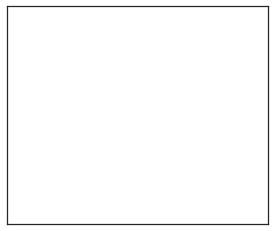

In [7]:
m = Basemap(
    projection='tmerc',
    lon_0 = -2.,
    lat_0 = 49.,
    ellps = 'WGS84',
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - extra + 0.01 * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + 0.01 * h,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)

m.readshapefile(
    '../Data/Geo_Data/geo/london_wards',
    'london',
    color='none',
    zorder=2)

In [8]:
london_polys = []
borough_names = []
for w_ind in range(len(m.london_info)):
    w = m.london_info[w_ind]
    print w
    if w['NAME'] in borough_names:
        london_polys[-1] = Polygon(m.london[w_ind])
        continue
    borough_names.append(w['CODE'])    
    london_polys.append(Polygon(m.london[w_ind]))
    
df_map = pd.DataFrame({
    'poly': london_polys,
    'borough_name': borough_names,
})
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
df_map['borough_name'] = df_map['borough_name'].str.strip()

{'TYPE_COD0': '   ', 'CODE': 'E05000405', 'NAME': 'Chessington South Ward', 'AREA': 0.0, 'POLYGON_ID': 50840, 'FILE_NAME': 'GREATER_LONDON_AUTHORITY', 'DESCRIPTIO': 'London Borough Ward', 'AREA_CODE': 'LBW', 'NUMBER': 52, 'UNIT_ID': 10884, 'HECTARES': 755.173, 'DESCRIPT1': '                                    ', 'TYPE_CODE': 'VA', 'NUMBER0': 733, 'SHAPENUM': 1, 'RINGNUM': 1, 'DESCRIPT0': 'CIVIL VOTING AREA'}
{'TYPE_COD0': '   ', 'CODE': 'E05000414', 'NAME': 'Tolworth and Hook Rise Ward', 'AREA': 0.0, 'POLYGON_ID': 117160, 'FILE_NAME': 'GREATER_LONDON_AUTHORITY', 'DESCRIPTIO': 'London Borough Ward', 'AREA_CODE': 'LBW', 'NUMBER': 106, 'UNIT_ID': 11407, 'HECTARES': 259.464, 'DESCRIPT1': '                                    ', 'TYPE_CODE': 'VA', 'NUMBER0': 734, 'SHAPENUM': 2, 'RINGNUM': 1, 'DESCRIPT0': 'CIVIL VOTING AREA'}
{'TYPE_COD0': '   ', 'CODE': 'E05000401', 'NAME': 'Berrylands Ward', 'AREA': 0.0, 'POLYGON_ID': 50449, 'FILE_NAME': 'GREATER_LONDON_AUTHORITY', 'DESCRIPTIO': 'London Bor

In [9]:
segnet_Mapillary = pd.read_csv('../Scripts/segnetLabels.csv')
mappilary_points = pd.read_csv('Mappilary_points.csv')


In [10]:
mappilary_points.head()

,Unnamed: 0,Imgkey,captureTime,isPano,lat,long,long_lat_string
0,0,SNkE9dXx2K0o3MaY9Zu-2A,2016-03-24T14:44:50.927Z,False,51.523651,-0.178409,-0.1784_51.5237
1,1,bneiFOYn9N2MQpjD-E7y-Q,2018-05-03T10:59:33.785Z,False,51.452568,-0.036538,-0.0365_51.4526
2,2,C5QMwGz01Rs6zk56q6fkeA,2018-12-09T15:42:45.172Z,False,51.462317,-0.389959,-0.3900_51.4623
3,3,YBQNM1wNdihc3tl1Jr1oDA,2014-08-04T10:19:53.000Z,False,51.508081,-0.095355,-0.0954_51.5081
4,4,6iT4CuOAHfSYNXWs_hlbdw,2015-11-25T13:50:11.000Z,False,51.485719,-0.120967,-0.1210_51.4857


In [11]:
merged = pd.merge(segnet_Mapillary, mappilary_points, on='Imgkey', how='inner')

In [12]:
merged.head()

,Imgkey,Sky,Building,Pole,Road_Marking,Road,Pavement,Tree,Sign_Symbol,Fence,Vehicle,Pedestrian,Bike,Unnamed: 0,captureTime,isPano,lat,long,long_lat_string
0,wE0jAFaY7S7kBlobMy3nPA,0.288501,0.104387,0.031655,0.006545,0.334103,0.012228,0.094468,0.006325,0.013235,0.102205,0.006343,0.000006,155358,2017-01-09T11:16:58.080Z,False,51.458700,-0.195153,-0.1952_51.4587
1,k_syhXZRKg-blx5cCvFdBg,0.168970,0.000347,0.004676,0.015434,0.240914,0.104091,0.455197,0.000156,0.010122,0.000006,0.000087,0.000000,331930,2019-08-20T20:07:23.000Z,False,51.395208,0.007908,0.0079_51.3952
2,iVXnlg3PQMPspbTFqRD9eA,0.021730,0.146528,0.012488,0.034340,0.262760,0.138669,0.303953,0.000434,0.002668,0.032488,0.041644,0.002297,92492,2019-06-09T17:11:34.567Z,False,51.532153,0.055075,0.0551_51.5322
3,amVTOx7uE0GuMkeN2ECC3w,0.249045,0.156707,0.001586,0.000017,0.146730,0.073339,0.352066,0.000012,0.001053,0.017598,0.000839,0.001007,205329,2015-04-15T11:11:25.227Z,False,51.522573,-0.036350,-0.0363_51.5226
4,46aeChblLDzqF3p4UjXb7g,0.061244,0.003218,0.000405,0.000527,0.147847,0.052610,0.707002,0.000764,0.021377,0.004624,0.000382,0.000000,121677,2016-08-29T16:15:48.000Z,False,51.622794,-0.136517,-0.1365_51.6228


In [13]:
# merged.to_csv('../Data/Mappilary_points_merged.csv')

In [14]:
gdf = geopandas.GeoDataFrame(merged, geometry=geopandas.points_from_xy(merged.long, merged.lat))


In [15]:
gdf.head()

,Imgkey,Sky,Building,Pole,Road_Marking,Road,Pavement,Tree,Sign_Symbol,Fence,Vehicle,Pedestrian,Bike,Unnamed: 0,captureTime,isPano,lat,long,long_lat_string,geometry
0,wE0jAFaY7S7kBlobMy3nPA,0.288501,0.104387,0.031655,0.006545,0.334103,0.012228,0.094468,0.006325,0.013235,0.102205,0.006343,0.000006,155358,2017-01-09T11:16:58.080Z,False,51.458700,-0.195153,-0.1952_51.4587,POINT (-0.19515 51.45870)
1,k_syhXZRKg-blx5cCvFdBg,0.168970,0.000347,0.004676,0.015434,0.240914,0.104091,0.455197,0.000156,0.010122,0.000006,0.000087,0.000000,331930,2019-08-20T20:07:23.000Z,False,51.395208,0.007908,0.0079_51.3952,POINT (0.00791 51.39521)
2,iVXnlg3PQMPspbTFqRD9eA,0.021730,0.146528,0.012488,0.034340,0.262760,0.138669,0.303953,0.000434,0.002668,0.032488,0.041644,0.002297,92492,2019-06-09T17:11:34.567Z,False,51.532153,0.055075,0.0551_51.5322,POINT (0.05507 51.53215)
3,amVTOx7uE0GuMkeN2ECC3w,0.249045,0.156707,0.001586,0.000017,0.146730,0.073339,0.352066,0.000012,0.001053,0.017598,0.000839,0.001007,205329,2015-04-15T11:11:25.227Z,False,51.522573,-0.036350,-0.0363_51.5226,POINT (-0.03635 51.52257)
4,46aeChblLDzqF3p4UjXb7g,0.061244,0.003218,0.000405,0.000527,0.147847,0.052610,0.707002,0.000764,0.021377,0.004624,0.000382,0.000000,121677,2016-08-29T16:15:48.000Z,False,51.622794,-0.136517,-0.1365_51.6228,POINT (-0.13652 51.62279)


In [16]:
%ls ../Data/GreaterLondon/

edges/  Mapillary_images/  nodes/  pointsJson/


In [17]:
London = gpd.read_file('../Data/Geo_Data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

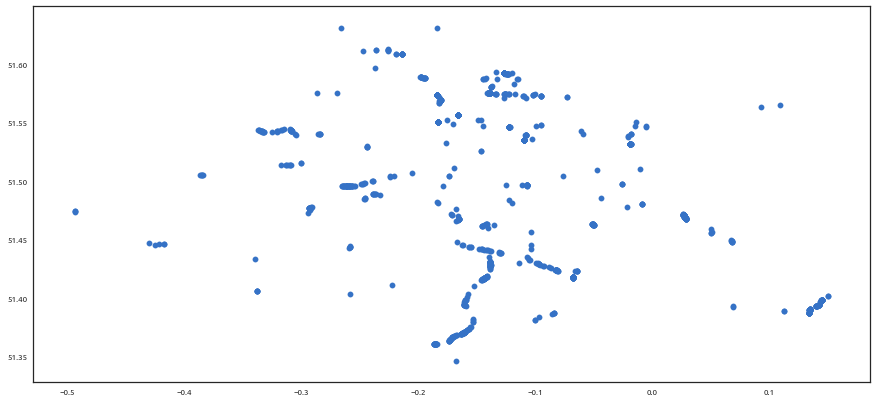

In [18]:
fig , ax = plt.subplots(figsize = (15,15))
# London.plot(ax = ax )
gdf[gdf['Tree']>0.90].plot(ax = ax )

In [19]:
SegnetLabels = ['Sky', 'Building', 'Pole','Road_Marking','Road','Pavement','Tree','Sign_Symbol','Fence','Vehicle','Pedestrian', 'Bike']

In [20]:

fdata_map_points = {}
for index, row in gdf.iterrows():
    fdata_map_points[m(row['long'], row['lat'])] = [float(row[k]) for k in SegnetLabels]

In [21]:
map_points = pd.Series(
    [Point(map_point) for map_point in fdata_map_points])
plaque_points = MultiPoint(list(map_points.values))
wards_polygon = prep(MultiPolygon(list(df_map['poly'].values)))
# # calculate points that fall within the London boundary
# ldn_points = list(filter(wards_polygon.contains, plaque_points))

In [22]:
# len(ldn_points)

In [23]:
map_points = pd.Series([Point(mapped_x, mapped_y) for (mapped_x, mapped_y) in fdata_map_points])
gsview_points = MultiPoint(list(map_points.values))

In [24]:
# calculate points that fall within the London boundary
gsview_ldn_points = list(filter(wards_polygon.contains, gsview_points))

In [25]:
len(gsview_ldn_points)

383311

In [26]:
# create a MultiPoint which we can check for set membership
df_map['gsview_point_list'] = df_map['poly'].map(lambda x: list(filter(prep(x).contains, gsview_ldn_points)))

In [27]:
df_map['gsview_segnet_tags_dict'] = df_map['gsview_point_list'].map(lambda x: [fdata_map_points[(p.x,p.y)] for p in x])

In [28]:
df_map= df_map.dropna()

In [29]:
df_map.head()

,borough_name,poly,area_m,area_km,gsview_point_list,gsview_segnet_tags_dict
0,E05000405,"POLYGON ((13004.06946679378 5643.556704930117,...",7.557384e+06,75.573841,"[POINT (13692.20125617523 6525.32624835975), P...","[[0.439108796296, 0.00052662037037, 0.01539930..."
1,E05000414,"POLYGON ((14432.57909461121 10890.80719812433,...",2.596590e+06,25.965904,"[POINT (14439.83409906657 10891.31895870264), ...","[[0.292951388889, 0.00484953703704, 0.01661458..."
2,E05000401,"POLYGON ((14710.57509348575 12747.79659884245,...",1.454965e+06,14.549655,[],[]
3,E05000400,"POLYGON ((17083.95639115885 12354.05967180899,...",2.687010e+06,26.870103,"[POINT (16396.02770139927 11363.05256452921), ...","[[0.20693287037, 0.10708912037, 0.009479166666..."
4,E05000402,"POLYGON ((18675.54168399898 13589.62372055175,...",1.879597e+06,18.795975,"[POINT (18227.92694639806 14187.84422109151), ...","[[0.0113136574074, 0.575596064815, 0.000815972..."


In [30]:
df_map = df_map.dropna()

In [31]:
len(df_map)

649

In [32]:
# for i in range(len(df_map)):
#     print np.mean(np.array(df_map['gsview_segnet_tags_dict'].iloc[i]), axis=0)

In [ ]:
scene_tags = []
total_pixels = []
for index in range(len(df_map)):
    mean = np.mean(np.array(df_map['gsview_segnet_tags_dict'].iloc[index]), axis=0)
    total = np.sum(np.array(df_map['gsview_segnet_tags_dict'].iloc[index]), axis=0)
    scene_tags.append(mean)
    total_pixels.append(total)
df_map['gsview_tags'] = scene_tags
df_map['total_gsview_pixels'] = total_pixels

In [ ]:
df_map = df_map.dropna()

In [ ]:
df_map.head()

In [ ]:
# scene_tags

In [ ]:


cats = ['Sky', 'Building', 'Pole','Road_Marking','Road','Pavement','Tree','Sign_Symbol','Fence','Vehicle','Pedestrian', 'Bike']

scene_tags_transpose = list(zip(*scene_tags))
scene_total_transpose = list(zip(*total_pixels))

for index in range(len(cats)):
    cat = cats[index]
    cat_total =  cats[index] + 'Total'
    df_map[cat] = scene_tags_transpose[index]
    df_map[cat_total] = scene_total_transpose[index]
    

In [ ]:
len(zip(*scene_tags)[0])

In [ ]:
df_map

In [ ]:
df_map.columns

In [ ]:
tree_data = pd.read_csv('../Data/Geo_Data/london_street_trees_gla_20180214.csv')

In [ ]:
tree_data

In [ ]:
len(tree_data)

In [ ]:
treeLocations = []
for index , row in tree_data.iterrows():
    point = Point(m(row['longitude'], row['latitude']))
    treeLocations.append(point)

print treeLocations[1]

tree_points = pd.Series(treeLocations)
tree_data_points = MultiPoint(list(tree_points.values))
# calculate points that fall within the London boundary
tree_ldn_points = list(filter(wards_polygon.contains, tree_data_points))
# create a MultiPoint which we can check for set membership
df_map['Tree_location_list'] = df_map['poly'].map(lambda x: list(filter(prep(x).contains, tree_ldn_points)))
df_map['TreeCount'] = df_map['Tree_location_list'].map(lambda x: len(x))

In [ ]:
df_map.head()

In [ ]:
gdf = gpd.GeoDataFrame(df_map[df_map['TreeCount']>100], crs={}, geometry='poly')

In [ ]:
Mapillary_gdf = gdf.copy()
# %store Mapillary_gdf

In [ ]:
len(gdf)

In [ ]:
# gdf.to_csv('Tree_Segnet.csv')

In [ ]:
# df_map = pd.read_csv('Tree_Segnet.csv')

In [ ]:
gdf['total_gsview_pixels'].iloc[2]

In [ ]:
sum(gdf['TreeCount'])

In [ ]:
polygon = gdf.iloc[15]['poly']

In [ ]:
polygon

In [ ]:
gdf.iloc[15].area_km

In [ ]:
polygon.area

In [ ]:
# df_map.to_csv('Tree_Segnet.csv')

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = gdf['TreeCount'].values.astype(float)
x2 = gdf['Tree'].values.astype(float)

minVal = float(np.min(x))
maxVal = float(np.max(x))

min_tree = float(np.min(x2))
max_tree = float(np.max(x2))

gdf['NormedTreeCount'] = (gdf['TreeCount']-minVal)/(maxVal-minVal)
gdf['NormedTreeSegnet'] = (gdf['Tree']-min_tree)/(max_tree-min_tree)

gdf['TreeDensity'] = np.log((gdf['TreeCount']*10.0)/gdf['area_km'])
gdf['TreePixelDensity'] = np.log((gdf['TreeTotal']*10.0)/gdf['area_km'])

In [ ]:
gdf.columns

In [ ]:
gdf['GSV_samples_per_sqkm'] = 0
samplesPerWard = {}
for index, row in gdf.iterrows():
    samplesPerWard[row['borough_name']] = float(len(row['gsview_point_list'])*10.0)/row['area_km']
    gdf.at[index,'GSV_samples_per_sqkm'] = float(len(row['gsview_point_list'])*10.0)/row['area_km']

In [ ]:
gdf.to_pickle('Ward_mapillary.pkl')

In [ ]:
gdf['decile'] = pd.qcut(gdf['GSV_samples_per_sqkm'], q=5, precision=0)

In [ ]:
gdf['decile_treeDensity'] = pd.qcut(gdf['TreeDensity'], q=5, precision=0)

In [ ]:
gdf

In [ ]:
mappilary_filtered = gdf[gdf['GSV_samples_per_sqkm'] >= 10]

In [ ]:
len(mappilary_filtered)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('ln(Images per ward (Mappilary))')
plt.ylabel('Frequency')
# plt.axvline(thresh_low, color='r')
# plt.axvline(thresh_high, color='r')
n, bins, patches = plt.hist(np.log(mappilary_filtered['GSV_samples_per_sqkm']), 100, facecolor='g', alpha=0.75)

In [ ]:
min(mappilary_filtered['TreeCount'])

In [ ]:
len(gdf)

In [ ]:
# df_map.head()

In [ ]:
from scipy.stats import pearsonr

In [ ]:
corr = pearsonr(gdf['TreeCount'],gdf['Tree'])
print corr

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
sns.set(font_scale=2) 
sns.regplot(x="TreeCount", y="Tree", data=mappilary_filtered);
plt.xlabel('Number of registered trees in a ward')
plt.ylabel('Mean Segnet Tree pixels')
ax.annotate("Pearson r: " +  str(corr[0])[:4] + '***',  xy=(0.1, 0.55),fontsize = 20)

In [ ]:
str(10)

In [ ]:
corr = pearsonr(mappilary_filtered['TreeDensity'],mappilary_filtered['TreePixelDensity'])
print corr
# fig, ax = plt.subplots()
# fig.set_size_inches(16,12)
sns.set(font_scale=2) 
ax = sns.jointplot(x=mappilary_filtered['TreeDensity'], y=mappilary_filtered['TreePixelDensity'], kind='regression',height=15);
plt.xlabel('ln(Trees per square km)')
plt.ylabel('ln(Tree pixels per square km)')
# ax.annotate("Pearson r: " +  str(corr[0])[:4] + '***',fontsize = 20)
ax.annotate(pearsonr)

In [ ]:
corrs = []
bins = []
for name, group in gdf.groupby('decile'):
    bins.append(name)
    corr = pearsonr(group['TreeDensity'],group['TreePixelDensity'])
    corrs.append(corr)

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_axes([0,0,1,1])
plt.xlabel("Wards binned by GSV samples per sq km",fontsize = 25)
plt.ylabel("Correlation of GSV green index with ln(trees/sqkm)",fontsize = 25)
xlabels = [str(b.left)+'-'+str(b.right) for b in bins]
c = [corr[0] for corr in corrs]
ax.bar(xlabels,c)

p = []
for corr in corrs: 
    if corr[1] > 0.05:
        p.append('ns')
    elif corr[1] <= 0.05 and corr[1] > 0.01  :
        p.append('*')
    elif corr[1] <= 0.01 and corr[1] > 0.001:
        p.append('**')
    elif corr[1] <= 0.001 and corr[1] > 0.0001:
        p.append('**')
    elif corr[1] <= 0.0001 and corr[1] > 0.00001:
        p.append('***')
    else :
        p.append('****')
for xi, yi, l in zip(*[xlabels, c, p]):
    ax.text(xi, yi, l , fontsize = 18)
    
    
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
corr = pearsonr(gdf['TreeTotal'],gdf['area_km']/10)
print corr
# fig, ax = plt.subplots()
# fig.set_size_inches(16,12)
sns.set(font_scale=2) 
ax = sns.jointplot(x=np.log(gdf['TreeTotal']), y=gdf['area_km']/10,kind='regression',height=15);
plt.xlabel('Total Tree Pixels per ward')
plt.ylabel('Area of ward(sqkm)')
# ax.annotate("Pearson r: " +  str(corr[0])[:4] + '***',fontsize = 20)
ax.annotate(pearsonr)

In [ ]:
wardpop = pd.read_csv('../Data/Geo_Data/housing-density-ward.csv')

In [ ]:
wardpop = wardpop.rename(columns={'Ward_Name': 'borough_name'})

In [ ]:
wardpop.head(n=10)

In [ ]:
tree = {}
tree_density = {}
pop_density = {}
pop = {}
names = []
for index, row in gdf.iterrows():
    wardname = ' '.join(row['borough_name'].split(' ')[:-1]).strip()
    names.append(wardname)
    tree_density[wardname] = row['TreeDensity']
    tree[wardname] = row['TreeCount']
    
for index,row in wardpop.iterrows():
    pop_density[row['borough_name']] = np.log10(row['Population_per_square_kilometre'])
    pop[row['borough_name']] = row['Population']
    
common =  set(wardpop['borough_name']).intersection(names)
        

In [ ]:
pop

In [ ]:
tree_to_people_ratio = {} 
for k in pop:
    if k in tree:
        tree_to_people_ratio[k] = float(tree[k])/float(pop[k])

In [ ]:
vals = np.log10(tree_to_people_ratio.values())
thresh_low = np.mean(vals) - 2*np.sqrt(np.var(vals))
thresh_high = np.mean(vals) + 2*np.sqrt(np.var(vals))

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('log10(Tree to people ratio)')
plt.ylabel('Frequency')
plt.axvline(thresh_low, color='r')
plt.axvline(thresh_high, color='r')
n, bins, patches = plt.hist(np.log10(tree_to_people_ratio.values()), 100, facecolor='g', alpha=0.75)

In [ ]:
filteredCommon = [k for k in common if np.log10(tree_to_people_ratio[k]) < thresh_high and  np.log10(tree_to_people_ratio[k]) > thresh_low ]

In [ ]:
print [k for k in common if np.log10(tree_to_people_ratio[k]) > thresh_high or  np.log10(tree_to_people_ratio[k]) < thresh_low ]

In [ ]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=[np.log(pop_density[k]) for k in filteredCommon] , y=[np.log(tree_density[k]) for k in filteredCommon],kind='regression',height=15);
plt.xlabel('ln(Population Density)')
plt.ylabel('ln(Tree density)')
ax.annotate(pearsonr)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('Ward Area')
plt.ylabel('Frequency')
n, bins, patches = plt.hist(gdf['area_km']/10.0, 100, facecolor='g', alpha=0.75)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('Total tree pixel fraction per ward')
plt.ylabel('Frequency')
n, bins, patches = plt.hist(gdf['TreeTotal'], 100, facecolor='g', alpha=0.75)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('Tree Segnet pixels per square km')
plt.ylabel('Frequency')
n, bins, patches = plt.hist(gdf['TreePixelDensity'], 100, facecolor='g', alpha=0.75)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('Number of registered trees in a ward')
plt.ylabel('Frequency')
n, bins, patches = plt.hist(gdf['TreeCount'], 100, facecolor='g', alpha=0.75)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('ln(Trees per square km)')
plt.ylabel('Frequency')
n, bins, patches = plt.hist(gdf['TreeDensity'], 100, facecolor='g', alpha=0.75)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('Spatial density of trees in a ward')
plt.ylabel('Frequency')
n, bins, patches = plt.hist(filtered_df['area_km']/10, 100, facecolor='g', alpha=0.75)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('Segnet tree pixel values')
plt.ylabel('Frequency')
n, bins, patches = plt.hist(filtered_df['Tree'], 100, facecolor='g', alpha=0.75)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.xlabel('Segnet tree pixel values')
plt.ylabel('Frequency')
n, bins, patches = plt.hist(filtered_df['Tree'], 100, facecolor='g', alpha=0.75)

In [ ]:
corr = pearsonr(filtered_df['TreeDensity'],filtered_df['Tree'])
print corr
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
sns.set(font_scale=2) 
sns.regplot(x="TreeDensity", y="Tree", data=filtered_df);
plt.xlabel('Ward spatial tree density (Trees/sqkm)')
plt.ylabel('Mean tree pixels per ward')
ax.annotate("Pearson r: " +  str(corr[0])[:5] + '***',  xy=(3000, 0.00005),fontsize = 20)

In [ ]:
corr = pearsonr(np.log10(filtered_df['TreeDensity']),np.log10(filtered_df['Tree']))
print corr
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
sns.set(font_scale=2) 
sns.regplot(x=np.log10(filtered_df['TreeDensity']), y=np.log10(filtered_df['Tree']));
plt.xlabel('Ward spatial tree density (Trees/sqkm) (log_10)')
plt.ylabel('Mean tree pixels per ward(log_10)')
ax.annotate("Pearson r: " +  str(corr[0])[:4] + '***',  xy=(2, -3 ),fontsize = 20)

In [ ]:
min(filtered_df['TreeCount'])

In [ ]:
ward_csv_CRESH = pd.read_csv('../Data/Geo_Data//uk_ward_greenspace.csv')

In [ ]:
ward_csv_CRESH.head()